In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
df = pd.read_csv(r"/content/labeled_tweets.csv")

In [14]:
df1 = df.copy()
df1=df1.drop_duplicates(subset=['full_text'], keep=False)
df1.head()
df1

,id,label,full_text
6,5.723350e+17,Offensive,of course you were born in serbia...you're as ...
7,5.723330e+17,Offensive,These girls are the equivalent of the irritati...
10,5.751740e+17,Offensive,"RT @PhxKen: SIR WINSTON CHURCHHILL: ""ISLAM IS ..."
11,5.692940e+17,Offensive,RT @TheRightWingM: Giuliani watched his city a...
12,4.464610e+17,Offensive,RT @YesYoureRacist: At least you're only a tin...
...,...,...,...
11957,NaN,Offensive,@BitchImFancy lol so retarded
11958,NaN,Offensive,@BitchImaStunna @VeshaaCouture lmao bitch shut up
11959,NaN,Offensive,@BitchMedia what's up my bitches?! Shout out f...
11960,NaN,Offensive,@Bitcheslovestar The only one of Mary's friend...


In [15]:
df1 = df1.dropna()
df1

,id,label,full_text
6,5.723350e+17,Offensive,of course you were born in serbia...you're as ...
7,5.723330e+17,Offensive,These girls are the equivalent of the irritati...
10,5.751740e+17,Offensive,"RT @PhxKen: SIR WINSTON CHURCHHILL: ""ISLAM IS ..."
11,5.692940e+17,Offensive,RT @TheRightWingM: Giuliani watched his city a...
12,4.464610e+17,Offensive,RT @YesYoureRacist: At least you're only a tin...
...,...,...,...
9433,5.723310e+17,Non-offensive,mmmm #MKR getting v boring @lisamromano @garyd...
9434,5.723310e+17,Non-offensive,"""Sass"" 😆😈😆\nRT @arna_jane: They say sass one m..."
9435,5.723310e+17,Non-offensive,“@jgto: Steve’s starting to annoy me #MKR”\n\n...
9436,5.723310e+17,Non-offensive,“@4Cate: Has Colin outside for a smoke #mkr”\...


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing 'id' and 'comments' columns,
# and 'target' is the column you want to predict

# Separate features (X) and target variable (y)
X = df1['full_text']
y = df1['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

6       of course you were born in serbia...you're as ...
7       These girls are the equivalent of the irritati...
10      RT @PhxKen: SIR WINSTON CHURCHHILL: "ISLAM IS ...
11      RT @TheRightWingM: Giuliani watched his city a...
12      RT @YesYoureRacist: At least you're only a tin...
                              ...                        
9433    mmmm #MKR getting v boring @lisamromano @garyd...
9434    "Sass" 😆😈😆\nRT @arna_jane: They say sass one m...
9435    “@jgto: Steve’s starting to annoy me #MKR”\n\n...
9436    “@4Cate: Has Colin outside for a smoke  #mkr”\...
9437                      "@panelrific: Let's go 🐧🐧🐧🐧🐧🐧😃"
Name: full_text, Length: 9268, dtype: object
6           Offensive
7           Offensive
10          Offensive
11          Offensive
12          Offensive
            ...      
9433    Non-offensive
9434    Non-offensive
9435    Non-offensive
9436    Non-offensive
9437    Non-offensive
Name: label, Length: 9268, dtype: object


In [17]:
df1.to_csv('/content/drive/MyDrive/Miniproject')

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train and X_test are DataFrame columns containing text data
# Preprocessing and vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())  # Convert to array if sparse matrix
X_test_scaled = scaler.transform(X_test_tfidf.toarray())  # Convert to array if sparse matrix


In [27]:
rfc.feature_importances_

array([2.81998218e-06, 9.35796112e-05, 6.08257371e-06, ...,
       1.45677494e-07, 3.60364291e-07, 6.12624051e-07])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preprocess and vectorize text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train_tfidf, y_train)

# Make predictions on the training set
y_pred_train = rfc.predict(X_train_tfidf)

# Evaluate the model on the training set
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train))


Classification Report on Training Set:
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00      5120
    Offensive       1.00      1.00      1.00      2294

     accuracy                           1.00      7414
    macro avg       1.00      1.00      1.00      7414
 weighted avg       1.00      1.00      1.00      7414



In [33]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

y_pred_test = rfc.predict(X_test_tfidf)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
pd.crosstab(y_test, y_pred_test)

# Print classification report
print("Classification Report on Testing Set:")
print(classification_report(y_test, y_pred_test))


[[1246   34]
 [ 243  331]]
Classification Report on Testing Set:
               precision    recall  f1-score   support

Non-offensive       0.84      0.97      0.90      1280
    Offensive       0.91      0.58      0.71       574

     accuracy                           0.85      1854
    macro avg       0.87      0.78      0.80      1854
 weighted avg       0.86      0.85      0.84      1854



<Axes: >

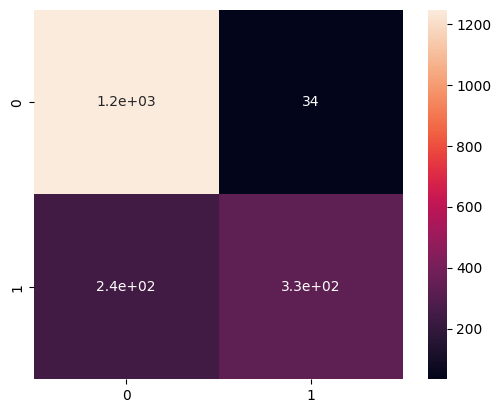

In [30]:
sns.heatmap(cm_test, square=True , annot=True)

[[5120    0]
 [   0 2294]]


<Axes: >

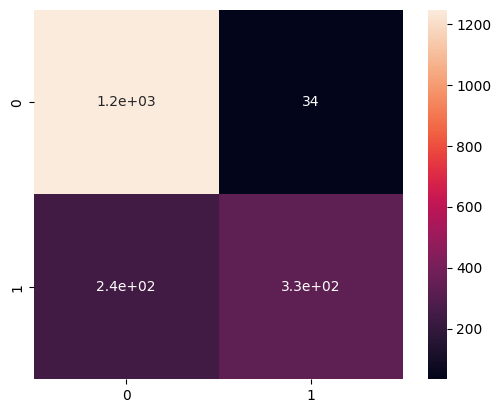

In [31]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
pd.crosstab(y_train, y_pred_train)
sns.heatmap(cm_test, square=True , annot=True)